In [1]:
import csv

import yaml

path = "./simple_tensorflow"

runs_data = [
    "ngc-22.03/gpu/22888530/0",
    "ngc-22.03/gpu/22931460",
    "ngc-22.03/gpu/22931528",
    "ngc-22.06/gpu/22888507/4",
    "ngc-22.06/gpu/22888496/0",
    "ngc-22.06/gpu/22931527",
    "ngc-22.03/cpu/22931349",
    "ngc-22.03/cpu/22931350",
    "ngc-22.03/cpu/22931351",
    "ngc-22.03/cpu/22931352",
    "ngc-22.03/cpu/22931353",
    "ngc-22.03/cpu/22931354",
    "ngc-22.03/cpu/22931355",
    "ngc-22.03/cpu/22931356",
    "ngc-22.03/cpu/22931359",
    "ngc-22.03/cpu/22931357",
    "ngc-22.06/cpu/22929216",
    "ngc-22.06/cpu/22929217",
    "ngc-22.06/cpu/22929219",
    "ngc-22.06/cpu/22929220",
    "ngc-22.06/cpu/22929221",
    "ngc-22.06/cpu/22929222",
    "ngc-22.06/cpu/22929223",
    "ngc-22.06/cpu/22929224",
    "ngc-22.06/cpu/22929226",
    "ngc-22.06/cpu/22929228",
    "dockerhub-2.8.0/gpu/22931462",
    "dockerhub-2.8.0/gpu/22931461",
    "dockerhub-2.8.0/gpu/22931529",
    "dockerhub-2.9.1/gpu/22888539/1",
    "dockerhub-2.9.1/gpu/22888543/0",
    "dockerhub-2.9.1/gpu/22931530",
    "dockerhub-2.8.0/cpu/22931339",
    "dockerhub-2.8.0/cpu/22931340",
    "dockerhub-2.8.0/cpu/22931341",
    "dockerhub-2.8.0/cpu/22931342",
    "dockerhub-2.8.0/cpu/22931343",
    "dockerhub-2.8.0/cpu/22931344",
    "dockerhub-2.8.0/cpu/22931345",
    "dockerhub-2.8.0/cpu/22931346",
    "dockerhub-2.8.0/cpu/22931347",
    "dockerhub-2.8.0/cpu/22931348",
    "dockerhub-2.9.1/cpu/22929201",
    "dockerhub-2.9.1/cpu/22929202",
    "dockerhub-2.9.1/cpu/22929203",
    "dockerhub-2.9.1/cpu/22929204",
    "dockerhub-2.9.1/cpu/22929209",
    "dockerhub-2.9.1/cpu/22929213",
    "dockerhub-2.9.1/cpu/22929205",
    "dockerhub-2.9.1/cpu/22929207",
    "dockerhub-2.9.1/cpu/22929206",
    "dockerhub-2.9.1/cpu/22929208",
    "dockerhub-2.9.1-cuda11.3-cudnn8.2/gpu/22931665",
    "dockerhub-2.9.1-cuda11.3-cudnn8.2/gpu/22931653",
]

runs = []

for run_data in runs_data:

    with open("%s/%s/mnist_convnet_system_info.yaml" % (path, run_data), "r") as file:
        system_info = yaml.safe_load(file)

        run = {}
        if "OSG_SITE_NAME" in system_info["env"]:
            run["site_name"] = (
                system_info["env"]["OSG_SITE_NAME"]
                .replace("-Backfill", "")
                .replace("-backfill", "")
            )
        elif "product_name" in system_info["dmi"]:
            run["site_name"] = system_info["dmi"]["product_name"]

        run["hostname"] = system_info["hostname"]

        if "SINGULARITY_NAME" in system_info["env"]:
            run["singularity_name"] = (
                system_info["env"]["SINGULARITY_NAME"]
                .replace("-tf2-py3.sif", "")
                .replace("-1.0.0.sif", "")
                .replace("-plus.sif", "")
                .replace(".sif", "")
            )
        else:
            run["singularity_name"] = ""

        if "AMD EPYC" in system_info["cpu"][0]["model name"]:
            run["cpu"] = system_info["cpu"][0]["model name"][0:13]
        elif "Intel" in system_info["cpu"][0]["model name"]:
            run["cpu"] = (
                system_info["cpu"][0]["model name"]
                .split("@")[0]
                .replace("CPU", "")
                .replace("(R)", "")
                .strip()
            )
        else:
            run["cpu"] = system_info["cpu"][0]["model name"]

        if system_info["gpu"] is not None:
            if type(system_info["gpu"]["nvidia_smi_log"]["gpu"]) == list:
                run["gpu"] = system_info["gpu"]["nvidia_smi_log"]["gpu"][0][
                    "product_name"
                ].replace("-PCIE", "")
            else:
                run["gpu"] = system_info["gpu"]["nvidia_smi_log"]["gpu"][
                    "product_name"
                ].replace("-PCIE", "")
        else:
            run["gpu"] = ""

        runs.append(run)

    with open("%s/%s/bidirectional_lstm_imdb.csv" % (path, run_data), "r") as file:

        run["bidirectional_lstm_imdb"] = []

        csv_reader = csv.reader(file, delimiter=",")
        for row in csv_reader:
            if row[8] != "test_accuracy":
                run["bidirectional_lstm_imdb"].append(float(row[8]))

    with open("%s/%s/imbalanced_classification.csv" % (path, run_data), "r") as file:

        run["imbalanced_classification"] = []

        csv_reader = csv.reader(file, delimiter=",")
        for row in csv_reader:
            if row[8] != "test_accuracy":
                run["imbalanced_classification"].append(float(row[8]))

    with open("%s/%s/mnist_convnet.csv" % (path, run_data), "r") as file:

        run["mnist_convnet"] = []

        csv_reader = csv.reader(file, delimiter=",")
        for row in csv_reader:
            if row[8] != "test_accuracy":
                run["mnist_convnet"].append(float(row[8]))

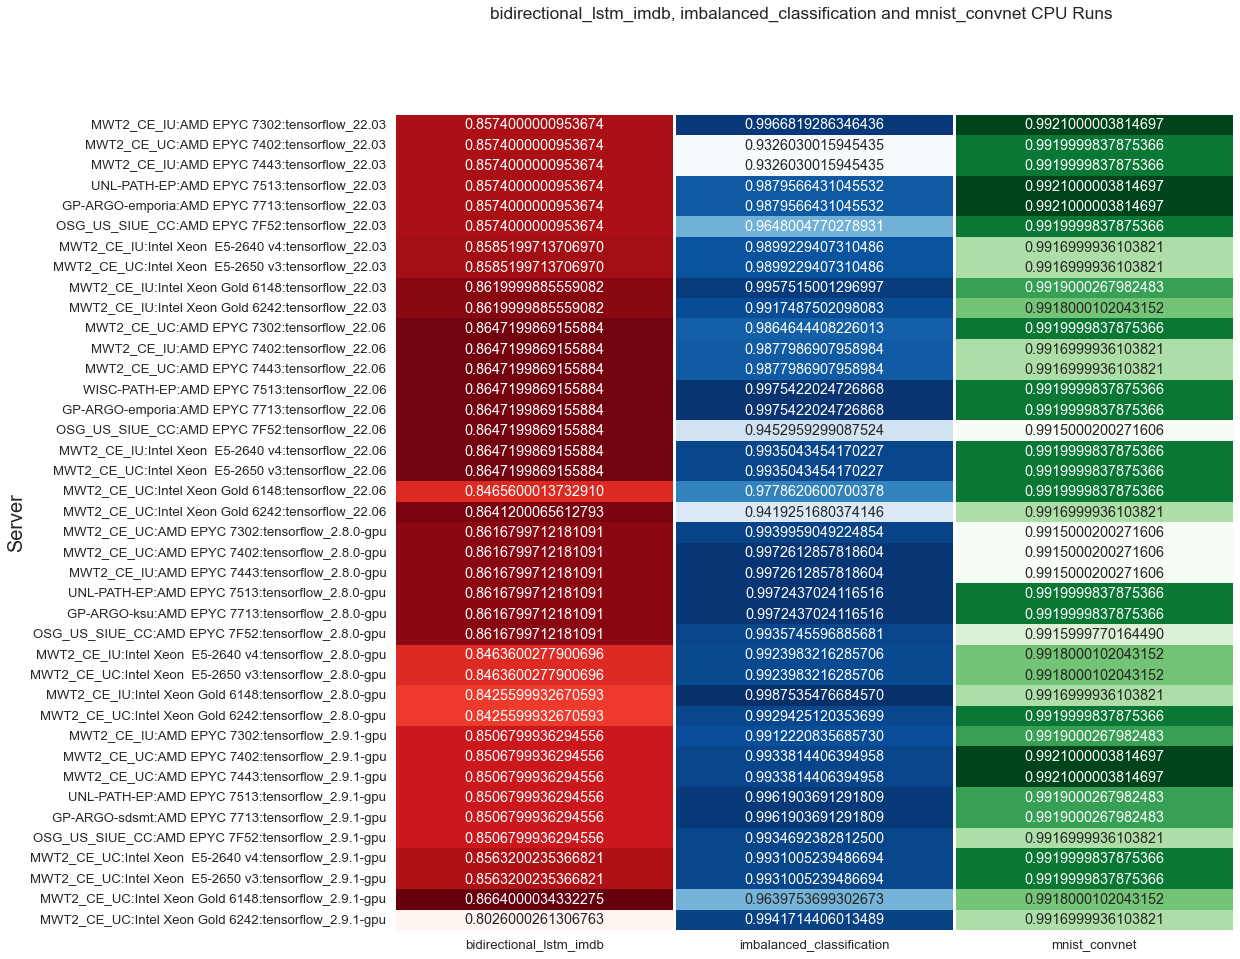

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.precision", 10)

bi_data = []
ib_data = []
mc_data = []
y_labels = []

for run in runs:
    if run["gpu"] == "":
        bi_data.append([run["bidirectional_lstm_imdb"][0]])
        ib_data.append([run["imbalanced_classification"][0]])
        mc_data.append([run["mnist_convnet"][0]])
        y_labels.append(
            "%s:%s:%s" % (run["site_name"], run["cpu"], run["singularity_name"])
        )

bi_df = pd.DataFrame(bi_data, index=y_labels, columns=["bidirectional_lstm_imdb"])
ib_df = pd.DataFrame(ib_data, index=y_labels, columns=["imbalanced_classification"])
mc_df = pd.DataFrame(mc_data, index=y_labels, columns=["mnist_convnet"])


sns.set(rc={"figure.figsize": (15, 15)})
sns.set(font_scale=1.2)

fig, (ax, ax2, ax3) = plt.subplots(ncols=3)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(bi_df, cmap="Reds", ax=ax, fmt=".16f", annot=True, cbar=False)
sns.heatmap(ib_df, cmap="Blues", ax=ax2, fmt=".16f", annot=True, cbar=False)
sns.heatmap(mc_df, cmap="Greens", ax=ax3, fmt=".16f", annot=True, cbar=False)

ax.set_ylabel("Server", fontsize=20)

ax2.set(yticklabels=[])
ax3.set(yticklabels=[])

fig.suptitle(
    "bidirectional_lstm_imdb, imbalanced_classification and mnist_convnet CPU Runs"
)

plt.show()

In [3]:
print(
    "bidirectional_lstm_imdb\t\tMIN: %s\tMAX: %s\tRANGE: %s"
    % (np.max(bi_data), np.min(bi_data), np.max(bi_data) - np.min(bi_data))
)
print(
    "imbalanced_classification\tMIN: %s\tMAX: %s\tRANGE: %s"
    % (np.max(ib_data), np.min(ib_data), np.max(ib_data) - np.min(ib_data))
)
print(
    "mnist_convnet\t\t\tMIN: %s\tMAX: %s\tRANGE: %s"
    % (np.max(mc_data), np.min(mc_data), np.max(mc_data) - np.min(mc_data))
)

bidirectional_lstm_imdb		MIN: 0.8664000034332275	MAX: 0.8026000261306763	RANGE: 0.06379997730255127
imbalanced_classification	MIN: 0.998753547668457	MAX: 0.9326030015945435	RANGE: 0.06615054607391357
mnist_convnet			MIN: 0.9921000003814697	MAX: 0.9915000200271606	RANGE: 0.000599980354309082


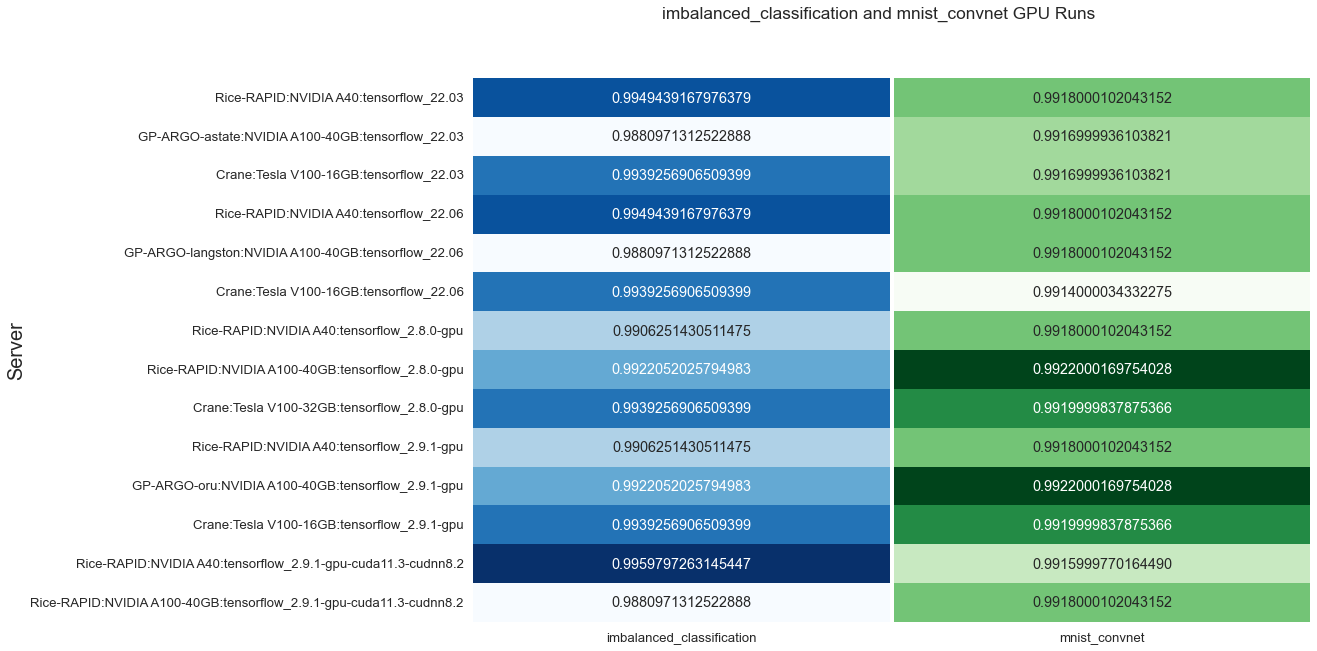

In [4]:
pd.set_option("display.precision", 10)

ib_data = []
mc_data = []
y_labels = []

for run in runs:
    if run["gpu"] != "":
        # Only record one GPU/Container Combo
        if not any(
            "%s:%s" % (run["gpu"], run["singularity_name"]) in y for y in y_labels
        ):
            ib_data.append([run["imbalanced_classification"][0]])
            mc_data.append([run["mnist_convnet"][0]])
            y_labels.append(
                "%s:%s:%s" % (run["site_name"], run["gpu"], run["singularity_name"])
            )

ib_df = pd.DataFrame(ib_data, index=y_labels, columns=["imbalanced_classification"])
mc_df = pd.DataFrame(mc_data, index=y_labels, columns=["mnist_convnet"])

sns.set(rc={"figure.figsize": (15, 10)})
sns.set(font_scale=1.2)

fig, (ax, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(ib_df, cmap="Blues", ax=ax, fmt=".16f", annot=True, cbar=False)
sns.heatmap(mc_df, cmap="Greens", ax=ax2, fmt=".16f", annot=True, cbar=False)

ax.set_ylabel("Server", fontsize=20)

ax2.set(yticklabels=[])

fig.suptitle("imbalanced_classification and mnist_convnet GPU Runs")

plt.show()

In [5]:
print(
    "imbalanced_classification\tMIN: %s\tMAX: %s\tRANGE: %s"
    % (np.max(ib_data), np.min(ib_data), np.max(ib_data) - np.min(ib_data))
)
print(
    "mnist_convnet\t\t\tMIN: %s\tMAX: %s\tRANGE: %s"
    % (np.max(mc_data), np.min(mc_data), np.max(mc_data) - np.min(mc_data))
)

imbalanced_classification	MIN: 0.9959797263145447	MAX: 0.9880971312522888	RANGE: 0.00788259506225586
mnist_convnet			MIN: 0.9922000169754028	MAX: 0.9914000034332275	RANGE: 0.000800013542175293


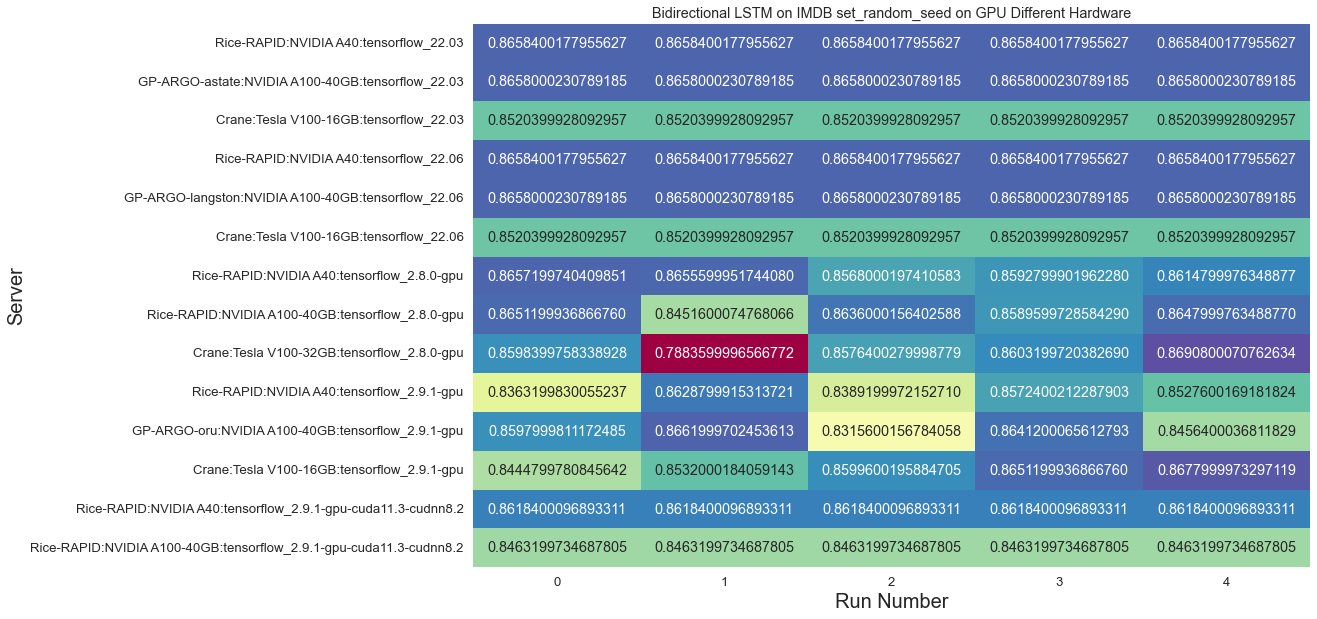

In [6]:
pd.set_option("display.precision", 10)

data = []
y_labels = []

for run in runs:
    if run["gpu"] != "":
        data.append(run["bidirectional_lstm_imdb"])
        y_labels.append(
            "%s:%s:%s" % (run["site_name"], run["gpu"], run["singularity_name"])
        )

x_labels = ["0", "1", "2", "3", "4"]

df = pd.DataFrame(data, index=y_labels, columns=x_labels)

sns.set(rc={"figure.figsize": (15, 10)})
sns.set(font_scale=1.2)

ax = sns.heatmap(df, annot=True, fmt=".16f", cbar=False, cmap="Spectral")

ax.set(title="Bidirectional LSTM on IMDB set_random_seed on GPU Different Hardware")
ax.set_xlabel("Run Number", fontsize=20)
ax.set_ylabel("Server", fontsize=20)

plt.show()

In [7]:
bi_data = list(np.concatenate(data).flat)
print(
    "bidirectional_lstm_imdb\t\tMIN: %s\tMAX: %s\tRANGE: %s"
    % (np.max(bi_data), np.min(bi_data), np.max(bi_data) - np.min(bi_data))
)

bidirectional_lstm_imdb		MIN: 0.8690800070762634	MAX: 0.7883599996566772	RANGE: 0.08072000741958618
